In [217]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift
import numpy as np

In [218]:
G2_DATA_PATH = "data/g2/g2-txt/"
G2_LABELS_PATH = "data/g2/g2-gt-txt/"

In [219]:
data = list(sorted(os.listdir(G2_DATA_PATH)))
labels = list(sorted(os.listdir(G2_LABELS_PATH)))

In [220]:
data = list(filter(lambda x: 'g2-2-' in x, data))
labels = list(filter(lambda x: 'g2-2-' in x, labels))

## G2 Dataset with meanshift

In [221]:
def test_meanshift(x, centroids, bandwidth=100):
    clustering = MeanShift(bandwidth=bandwidth).fit(x.values)
    centroids_ms = clustering.cluster_centers_
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1])
    plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], color='red')
    plt.title("GT Labels")
    plt.subplot(1, 2, 2)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1])
    plt.scatter(centroids_ms[:, 0], centroids_ms[:, 1], color='red')
    plt.title("Meanshift")
    plt.show()

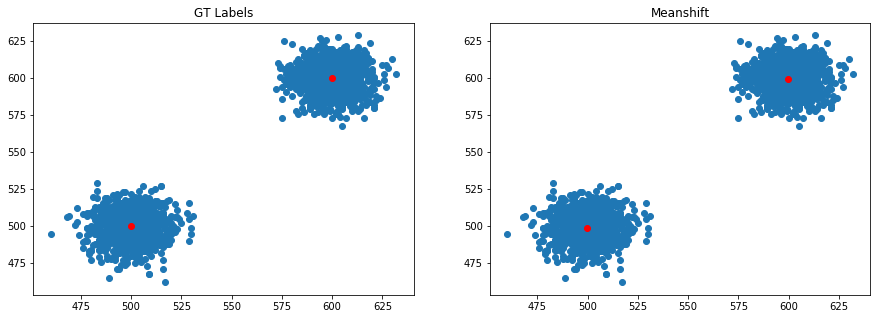

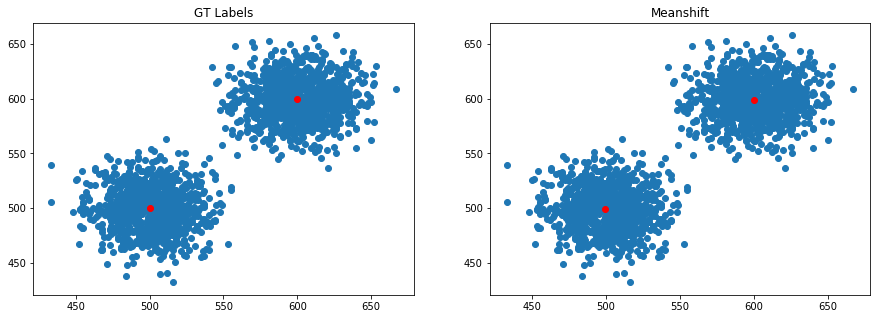

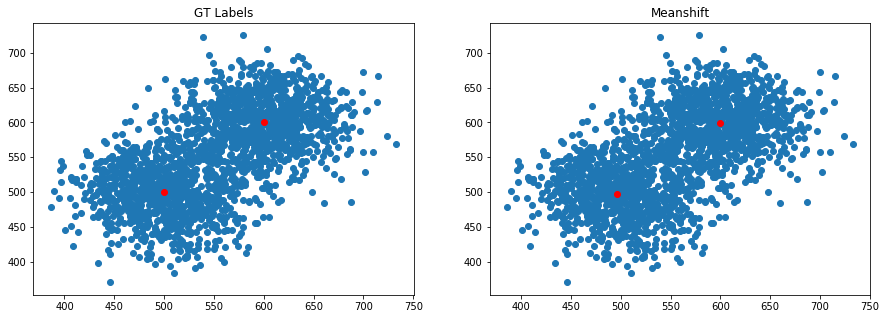

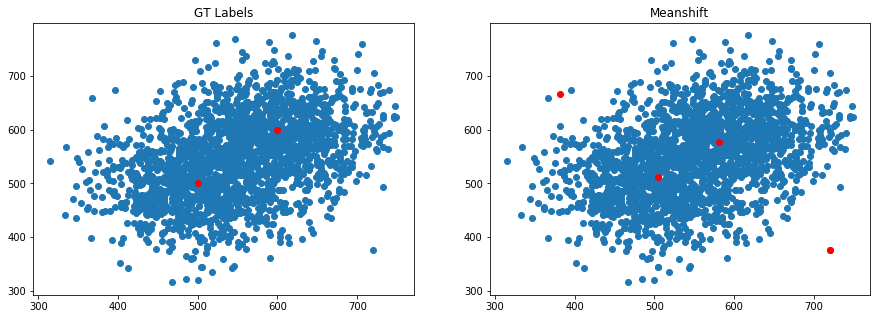

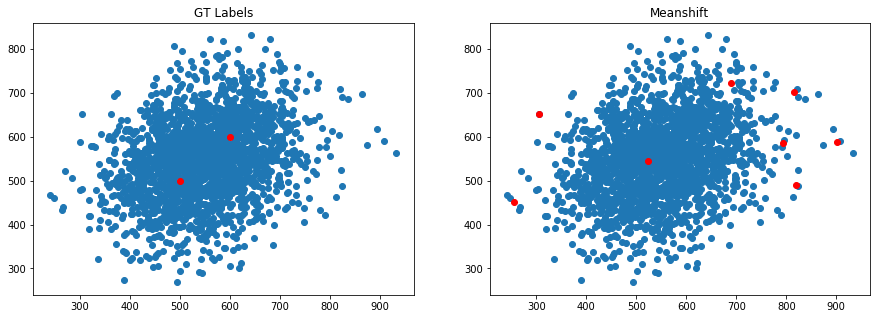

In [222]:
for i in [0, 2, 4, 6, 8]:
    x = pd.read_csv(f"{G2_DATA_PATH}{data[i]}", sep='\s+', header=None)
    centroids = pd.read_csv(f"{G2_LABELS_PATH}{labels[i]}", sep='\s+', header=None)
    test_meanshift(x, centroids, bandwidth=50)

## S1 dataset with meanshift

In [209]:
S1_DATA_PATH = "data/s/s1.txt"
S1_LABELS_PATH = "data/s/s1-cb.txt"

In [210]:
x = pd.read_csv(f"{S1_DATA_PATH}", sep='\s+', header=None)
centroids = pd.read_csv(f"{S1_LABELS_PATH}", sep='\s+', header=None)

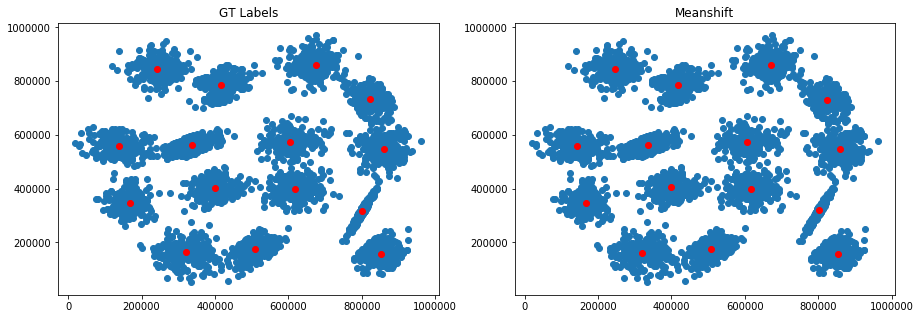

In [211]:
test_meanshift(x, centroids, bandwidth=100000)

In [224]:
S1_DATA_PATH = "data/s/s2.txt"
S1_LABELS_PATH = "data/s/s2-cb.txt"

In [225]:
x = pd.read_csv(f"{S1_DATA_PATH}", sep='\s+', header=None)
centroids = pd.read_csv(f"{S1_LABELS_PATH}", sep='\s+', header=None)

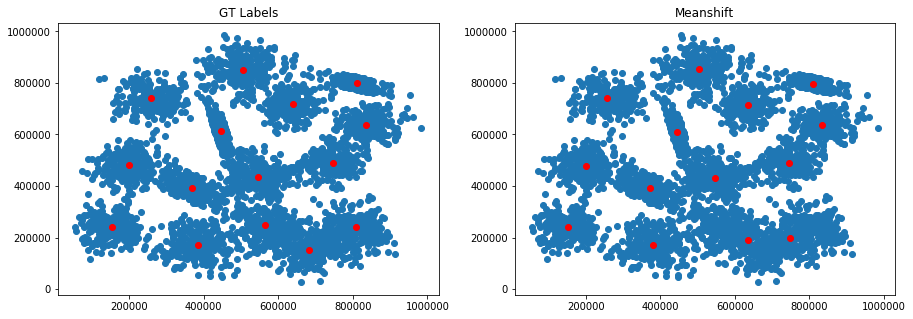

In [214]:
test_meanshift(x, centroids, bandwidth=100000)

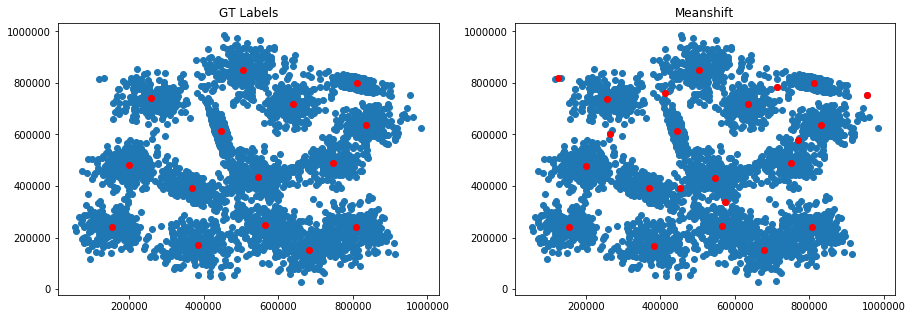

In [228]:
# Small bandwidth
test_meanshift(x, centroids, bandwidth=50000)

## Results

Meansift is good at finding dense clusters. We can see that dataset G starts from easily separable clusters and merges slowly. Once clusters become too close meanshift no longer able to cluster data good because regions become more dense between clusters. If we increase bandwidth we will get less clusters - if we decrease we get more. Small bandwidth can result in multiple centroids where one is clearly make sense because dense region could be much bigger than bandwidth. 

For S dataset we can see that meanshift performs not bad, there are clearly detected dense regions (clusters).
In this case bandwidth is also very important because small bandwidth will result in multiple duplicate clusters 